1,
A simple linear regression model describes the relationship between a predictor variable x (independent variable) and an outcome variable Y (dependent variable) through a linear equation. 
The basic form of the model is:Yi= β0 +β1xi+ϵi
where:
Yi is the outcome for the i-th observation.
xi is the predictor for the i-th observation.
β0 is the intercept term, representing the value of Y when x=0.
β1 is the slope coefficient, showing how much Y changes with a unit change in x.
ϵi is the error term (noise), which represents the deviation of the observed Y values from the model's prediction.
In a theoretical model, we assume that the error term 
ϵi is normally distributed with mean 0 and standard deviation σ.

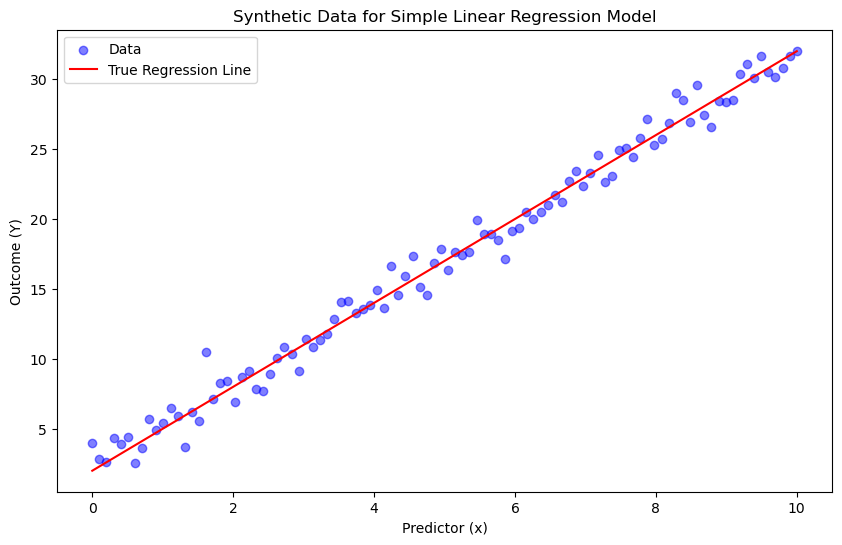

In [1]:
1,
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

# Set the parameters
n = 100  # number of data points
beta0 = 2  # intercept
beta1 = 3  # slope
sigma = 1  # standard deviation of the errors

# Generate predictor values x
x = np.linspace(0, 10, n)

# Generate normally distributed errors
errors = norm.rvs(loc=0, scale=sigma, size=n)

# Generate the outcome variable Y
Y = beta0 + beta1 * x + errors

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(x, Y, label='Data', color='blue', alpha=0.5)
plt.plot(x, beta0 + beta1 * x, color='red', label='True Regression Line')
plt.xlabel('Predictor (x)')
plt.ylabel('Outcome (Y)')
plt.title('Synthetic Data for Simple Linear Regression Model')
plt.legend()
plt.show()


                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                     7290.
Date:                Fri, 08 Nov 2024   Prob (F-statistic):           8.32e-94
Time:                        04:05:15   Log-Likelihood:                -142.31
No. Observations:                 100   AIC:                             288.6
Df Residuals:                      98   BIC:                             293.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.2085      0.201     10.968      0.0

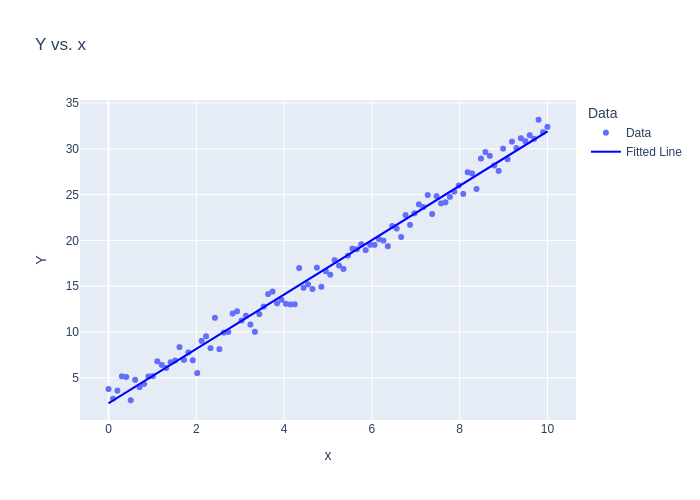

In [3]:
2,
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
import plotly.express as px

# Step 1: Simulate the data
np.random.seed(0)  # For reproducibility
n = 100  # Number of data points
beta0 = 2  # Intercept
beta1 = 3  # Slope
sigma = 1  # Standard deviation of errors

# Generate random x values
x = np.linspace(0, 10, n)

# Generate random errors (normally distributed)
errors = np.random.normal(0, sigma, n)

# Compute Y values based on the regression equation
Y = beta0 + beta1 * x + errors

# Step 2: Create a DataFrame
df = pd.DataFrame({'x': x, 'Y': Y})

# Step 3: Fit the linear regression model
model_data_specification = smf.ols("Y ~ x", data=df)
fitted_model = model_data_specification.fit()

# Step 4: Print the summary of the fitted model
print(fitted_model.summary())

# Step 5: Add a label column for visualization purposes
df['Data'] = 'Data'  # Just a label to help with the legend

# Step 6: Visualize the data with the fitted line
fig = px.scatter(df, x='x', y='Y', color='Data', trendline='ols', title='Y vs. x')

# Alternatively, manually add the fitted line (optional)
fig.add_scatter(x=df['x'], y=fitted_model.fittedvalues, line=dict(color='blue'), name="Fitted Line")

# Step 7: Show the plot
fig.show(renderer="png")  # Use PNG renderer for compatibility in some environments


3,
In this analysis, we plot two lines to highlight the difference between the theoretical model and the fitted model obtained from sample data. The theoretical line represents the true relationship between x and Y, based on predefined parameters β0 and β1 without any random noise. This line reflects the ideal underlying relationship, assuming no variability. On the other hand, the fitted line is derived from a specific dataset generated by adding random errors to the theoretical model. Due to this noise, the fitted line may slightly differ from the theoretical line, capturing the best linear approximation based on the observed data. The difference between these two lines illustrates random sampling variation—if we repeated this process with different samples, the fitted line would vary, while the theoretical line would remain constant. This comparison demonstrates how sample variability can impact model estimates in practice.

4,
The fitted_model.fittedvalues in a simple linear regression represent the predicted values (Yi) for each observation, calculated using the estimated coefficients obtained from the fitted model. These predicted values are based on fitted_model.params, which contains the estimated intercept (beta0) and slope (beta1) of the regression line. After fitting the model to the data, the estimated regression equation Yi = beta0 + beta1 * xi is used to compute each fitted value by plugging in each predictor value xi from the dataset. These coefficients, detailed in fitted_model.summary().tables, provide statistical insights, such as confidence intervals and p-values, which assess the significance and reliability of the estimates. Thus, fitted_model.fittedvalues represent sample-specific predictions that reflect random sampling variation and would vary with different datasets, unlike the fixed theoretical model parameters.

5,
In ordinary least squares (OLS) regression, the fitted line is chosen by minimizing the sum of the squared residuals, where a residual is the difference between the observed value (Yi) and the predicted value Yi from the model. The squared residuals are used because squaring ensures that all deviations, whether positive or negative, are treated equally, and it emphasizes larger errors. By minimizing the sum of these squared residuals, OLS finds the line that best fits the data by balancing the deviations of the observed data points around the line. This method results in a line that provides the smallest possible average distance from the data points, in terms of squared errors, leading to the most accurate linear prediction for the dataset as a whole.

6,
The R-squared value in simple linear regression represents the proportion of the variation in the outcome variable Y that is explained by the model’s predictions. The first expression, 1 - ((Y - fitted_model.fittedvalues)**2).sum() / ((Y - Y.mean())**2).sum(), calculates R-squared by comparing the sum of squared residuals (differences between observed and predicted
Y values) to the total sum of squares (differences between observed Y values and their mean), indicating how much of Y's variation is accounted for by the model. The fitted_model.rsquared attribute directly provides this measure, interpreting it as the model's accuracy. Additionally, np.corrcoef(Y, fitted_model.fittedvalues)[0,1]**2 gives R-squared by squaring the correlation betweenY and the fitted values, while np.corrcoef(Y, x)[0,1]**2 gives the squared correlation between Y and x, indicating how much of Y’s variation is explained solely by x. Together, these expressions capture how well the model and the predictor explain the variance in Y.

7,
This code creates a visualization of the "Old Faithful Geyser" dataset, showing the relationship between "waiting" time between eruptions and "duration" of eruptions. It first generates a scatter plot with a simple linear regression trendline (using `trendline='ols'`), which illustrates the overall linear relationship between the two variables. To capture potential non-linear patterns, the code also applies a LOWESS (Locally Weighted Scatterplot Smoothing) trendline. LOWESS is a flexible smoothing method that adjusts to local variations in the data, and the smoothing level is controlled by the `frac` parameter, set to 0.25 here. This smoothed curve is added to the plot alongside the linear trendline, allowing a comparison between the linear approximation and a more nuanced, locally adaptive fit. This combination of trendlines provides insight into both the global linear trend and any local deviations, offering a more comprehensive view of the relationship between "waiting" and "duration" in the dataset.

8,
In this analysis, the null hypothesis (\( H_0 \)) is that there is no linear association between "waiting" time and "duration" of eruptions in the Old Faithful Geyser dataset, implying that the slope parameter of the simple linear regression model is zero. After fitting the model using the code provided, we can examine the p-value associated with the slope parameter to evaluate this hypothesis. If the p-value is low (e.g., below 0.05), it indicates evidence against the null hypothesis, suggesting a statistically significant linear association between "waiting" and "duration." Based on the guidance, different ranges of p-values represent varying strengths of evidence. For instance, if the p-value is between 0.05 and 0.1, we have weak evidence against the null, whereas a p-value below 0.001 would imply very strong evidence. This result would inform our belief about whether "waiting" time can reliably predict "duration" in this dataset, with lower p-values supporting the presence of a meaningful linear relationship.

9,
In this analysis, we explore whether a relationship exists between "waiting" time and "duration" of eruptions in the Old Faithful Geyser dataset, specifically for short wait times below a certain threshold (e.g., 62, 64, or 66 minutes). By setting a `short_wait_limit` and filtering the dataset to only include observations with "waiting" times less than this limit, we focus on cases with shorter intervals between eruptions. The null hypothesis (\( H_0 \)) is that there is no linear association between "waiting" and "duration" for these short wait times, implying that the slope parameter in the regression would be zero.

After running the code provided, we would examine the p-value associated with the slope parameter to assess evidence against the null hypothesis. If the p-value is small (e.g., below 0.05), it would indicate evidence of a linear relationship between "waiting" and "duration" even for these shorter intervals. Comparing the results for different values of `short_wait_limit` (62, 64, 66) allows us to see if the relationship holds consistently across these thresholds or if it diminishes as the limit changes. This analysis would help determine whether a shorter "waiting" period is still a meaningful predictor of eruption "duration" in this restricted dataset.

10,
In this analysis, we focus on the "long wait times" in the Old Faithful Geyser dataset (where wait times exceed 71 minutes) to investigate the relationship between "waiting" time and "duration" of eruptions. First, we apply bootstrapping by repeatedly sampling from this subset, fitting a simple linear regression model (duration ~ waiting) to each sample, and collecting the slope coefficients to form a bootstrapped sampling distribution. Next, to test the null hypothesis of "no linear association," we simulate samples under conditions where the true slope (\( \beta_1 \)) is zero, meaning the "duration" is modeled only by an intercept (1.65) plus random noise with a standard deviation of 0.37. By fitting a model to each simulated sample, we generate the sampling distribution of the slope under the null hypothesis. We then compare the two distributions: if the 95% confidence interval from the bootstrapped distribution does not contain zero, or if the observed slopes significantly differ from the simulated null slopes (yielding a low p-value), we have evidence of a significant linear relationship for long wait times. This combined approach of bootstrapping and simulation enables a robust evaluation of the association between waiting time and eruption duration in this subset of data.

11,
In this analysis, we redefine the "wait time" variable in the Old Faithful Geyser dataset by grouping it into two categories: "short" for wait times under 68 minutes and "long" for wait times above 71 minutes. Using this categorization, we fit a simple linear regression model with an indicator variable for the "kind" of wait time, allowing us to test for a difference in eruption duration between "short" and "long" waits. This approach contrasts with previous models that only examined the overall relationship between "waiting" and "duration" or analyzed subsets of the data separately. By including the indicator variable, we can directly test the null hypothesis of "no difference between groups on average," assessing whether the mean duration of eruptions differs significantly between "short" and "long" wait times. The use of this indicator variable enables a clearer comparison of average eruption durations across the two categories, which provides insights into how wait times might influence eruption length in a more structured manner than previous analyses.

12,
To assess the plausibility of the assumption that the error terms in each model are normally distributed, we examine the histograms of the residuals from each of the models. The model whose histogram displays a symmetric, bell-shaped distribution centered around zero suggests that the residuals are approximately normally distributed, supporting the assumption of normality. If a histogram shows skewness, kurtosis, or multimodal characteristics, it indicates deviations from normality, which undermines the assumption for that model. In this context, we would expect only one of these models' residuals to align closely with a normal distribution, while the others likely exhibit patterns (e.g., skew or heavy tails) due to differences in the subset of data or model structure, making them less supportive of the normality assumption.

13,
In this question, we use two methods—permutation testing and bootstrap confidence intervals—to test for a difference in eruption durations between "short" and "long" wait times in the Old Faithful Geyser dataset.

**(A) Permutation Test**: In the permutation test, we assess the null hypothesis (H0: Mu_short = Mu_long) by randomly shuffling the "kind" labels (short and long) across the dataset. This process creates "new" groups with randomized labels, allowing us to compute the mean difference in durations for each permutation. By repeating this procedure many times, we obtain a distribution of mean differences under the null hypothesis. Comparing the observed mean difference to this distribution lets us determine if the observed difference is unusual, providing a p-value as evidence against H0.

**(B) Bootstrap Confidence Interval**: In the bootstrap approach, we repeatedly resample with replacement within each group (short and long) and calculate the mean difference between these resampled groups for each iteration. The distribution of these mean differences provides a basis to calculate a 95% confidence interval, indicating the likely range of the true mean difference in durations between the two groups. If this interval excludes zero, it suggests a significant difference.

**Comparison with Indicator Variable Approach**: The permutation and bootstrap methods differ from the indicator variable model (as used in Question 11), which fits a single regression model with an indicator for "kind" of wait time. While the indicator variable model directly estimates the difference within a regression framework, the permutation and bootstrap methods do not assume a specific model structure, allowing for a nonparametric approach to test for group differences. This flexibility can provide a more robust assessment of the difference without assuming a linear relationship, unlike the indicator variable approach that presumes a certain model form.

14,
Yes.